In [23]:
from sklearn.datasets import make_blobs
from random import randint
import matplotlib.pyplot as plt
import math
%matplotlib inline
# Generate dataset(data points,variables,clusters,seed,std)
X, y = make_blobs(n_samples=1000, n_features=2, centers=5, random_state=42, cluster_std=1.0)

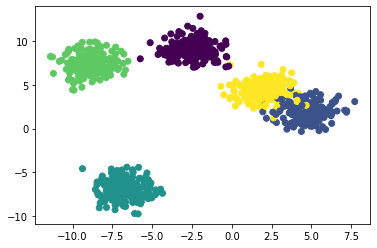

In [24]:
plt.scatter(X[:,0], X[:,1], c= y)
plt.show()

In [15]:
class K_Means:
    
    # initializam algoritmul
    def __init__(self, k=2, tol=0.001, max_iter=800):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    
    def dist(self, a, b):
        dis = (a - b)** 2 
        return math.sqrt(sum(dis))
    
        
    def fit(self, data):
        
        # 1 Punct random
        first_point = randint(0, len(X)-1)
        self.centroids_ = {0 : first_point}
                           
        # 2 Calcul distanta minima
        for i in range(self.k-1):
            min_distances = []
            for i in range(len(X)):
                temp_dist = math.inf
                for c in range(len(self.centroids_)):
                    temp_dist = min(temp_dist, self.dist(X[i], X[self.centroids_[c]]))
                min_distances.append(temp_dist)
                      
            # 3 De k ori aplic distanta maxima
            self.centroids_.update(
                {max(self.centroids_.keys())+1 : min_distances.index(max(min_distances))} #
                                 )
            
        #print(self.centroids_)  
        
        # transformam din index in coordonate
        self.centroids_ = dict((idx, value) for idx, value in enumerate(X[list(self.centroids_.values())])) #
#         print(self.centroids_)
#         print(list(self.centroids_.values()))    
        self.initial_centroid = self.centroids_
        #-----------------------------------------------------------------------
        for i in range(self.max_iter):
            # self_classification = {CLUSTER : [LISTA PUNCTE]}
            #  dictionar cu puncte pentru fiecare cluster
            self.classifications = {}  
            #  iterez prin numarul de clastere
            for i in range(self.k):  
                # pentru fiecare cluster in dictionarul clasification se creaza lista goala
                self.classifications[i] = []  

            # 4 Calculam distanta de la un punct din cluster pina la fiecare centroid
            for featureset in data:
                distances = [self.dist(featureset, self.centroids_[centroid]) for centroid in self.centroids_]
                #print(distances)
                # clusteru pina la care distanta e minima
                classification = distances.index(min(distances))
                           
                # 4.1 adaugam punctul in lista al clusterul cel mai apropiat
                self.classifications[classification].append(featureset) 

            prev_centroids = dict(self.centroids_) # creem o copie a centroizilor
            
            # 5 Calculez mean vector coordonate
            # calculez average pentru fiecare cluster
            for classification in self.classifications:
                column_average = []
                for j in range(len(self.classifications[classification][0])):
                    column_sum = 0
                    for i in range(len(self.classifications[classification])):
                        column_sum += self.classifications[classification][i][j]
                    column_average.append(column_sum / len(self.classifications[classification]))
                self.centroids_[classification] = column_average
             
            optimized = True
            
            # 6 facem update la centroizii vachi cu cei noi calculate dupa mean, average
            # iteram prin lista noua a centroizilor
            for c in self.centroids_:  
                # centroidul precedent
                original_centroid = prev_centroids[c] 
                # centroidul calculat pe baza de medie clusterului 
                current_centroid = self.centroids_[c] 
                # Aflam distanta dintre curent si nou
                result = []
                for i in range(len(current_centroid)):
                    result.append((current_centroid[i] - original_centroid[i])/original_centroid[i]*100.0)
                           
                # 7 Comparam centroizii vechi cu cei noi dupa toleranta
                if sum(result) > self.tol:
                    optimized = False
                
            # daca distanta e mai mica ca toleranta atunci se opreste          
            if optimized:
                break
        


#returnam lista de predictii
    
    def predict(self,data):
        prediction = []
        for i in range(len(data)):
            # 1 Pentru fiecare punct din dataset calculam distanta pina la fiecare centroid              
            distances = [self.dist(data[i], self.centroids_[centroid]) for centroid in self.centroids_]
            # 2 Distanta minima reprezinta clusterul punctului               
            classification = distances.index(min(distances))
            # 3 Adaug clasterul la prediction               
            prediction.append(classification)
        return prediction

In [16]:
%%time
Kmean = K_Means(5)
Kmean.fit(X)
y = Kmean.predict(X)


CPU times: user 151 ms, sys: 2.8 ms, total: 154 ms
Wall time: 152 ms


In [17]:
Kmean.initial_centroid

{0: [-2.502651593179152, 9.039637686479452],
 1: [-6.686306908962288, -6.811394552203649],
 2: [4.674926267936899, 1.8719734610830898],
 3: [-8.80798056241307, 7.404257039850026],
 4: [2.040179607668999, 4.258625135607529]}

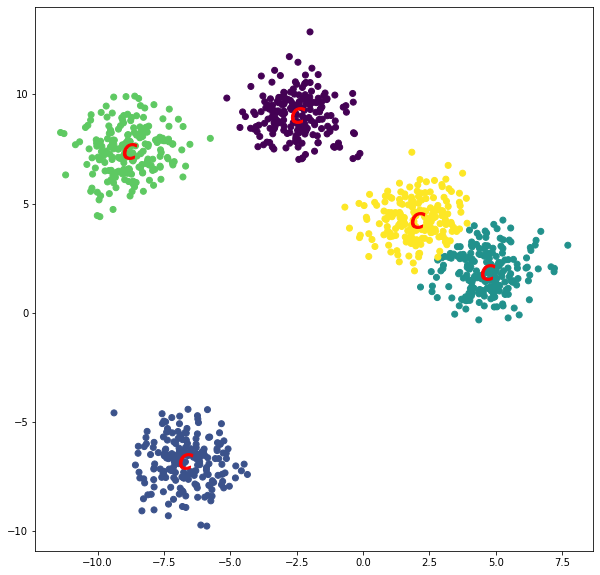

In [18]:
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], c= y)
for centroid in Kmean.centroids_:
    plt.scatter(Kmean.centroids_[centroid][0], Kmean.centroids_[centroid][1],
                    marker='$c$', color="red", s=250)